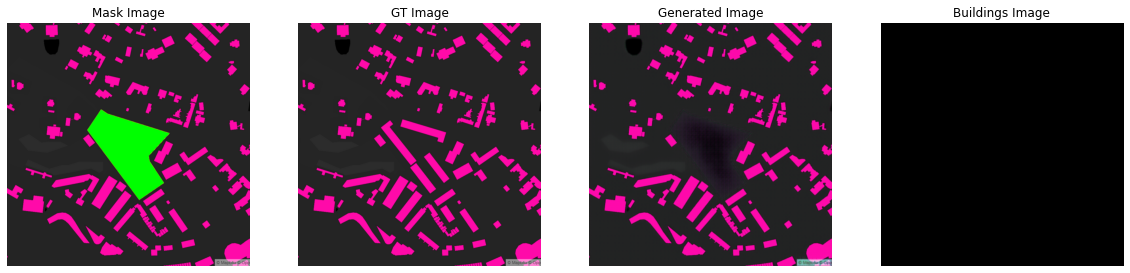

Image: 1040.png, GPR: 1.4, Simplified GPR: 1.4, Storeys:5,  Site area: 23065.1, Building pixels: 0, Mask pixels: 15996, Generated GPR: 0.0


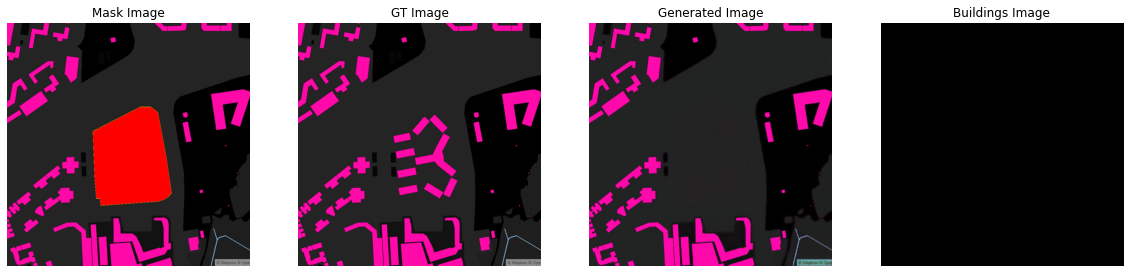

Image: 1074.png, GPR: 2.5, Simplified GPR: 2.8, Storeys:12,  Site area: 37265.0, Building pixels: 0, Mask pixels: 27225, Generated GPR: 0.0


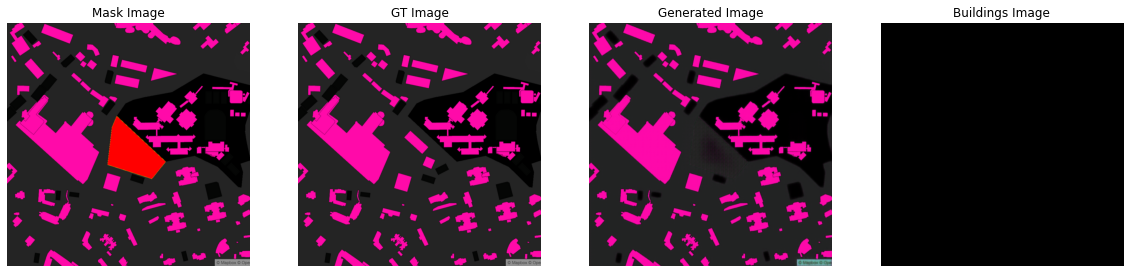

Image: 1076.png, GPR: 2.8, Simplified GPR: 2.8, Storeys:36,  Site area: 10414.2, Building pixels: 0, Mask pixels: 8425, Generated GPR: 0.0


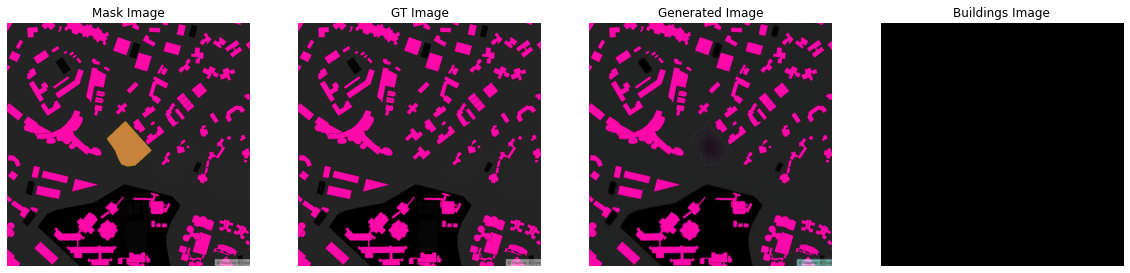

Image: 1102.png, GPR: 1.6, Simplified GPR: 1.6, Storeys:12,  Site area: 6157.3, Building pixels: 0, Mask pixels: 4766, Generated GPR: 0.0


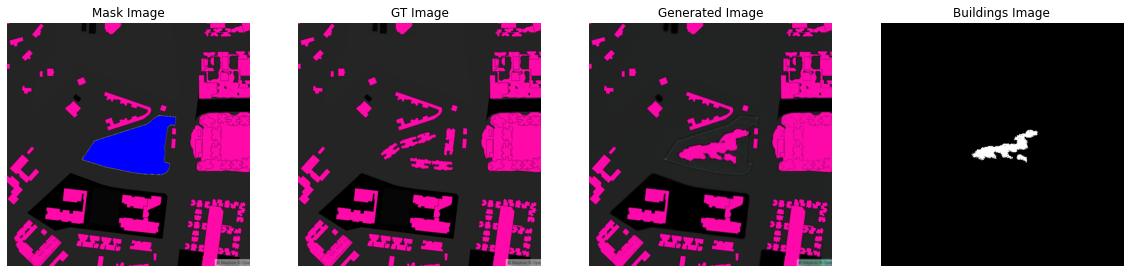

Image: 1180.png, GPR: 3.0, Simplified GPR: 3.0, Storeys:15,  Site area: 19547.0, Building pixels: 3092, Mask pixels: 14134, Generated GPR: 3.281448988255271


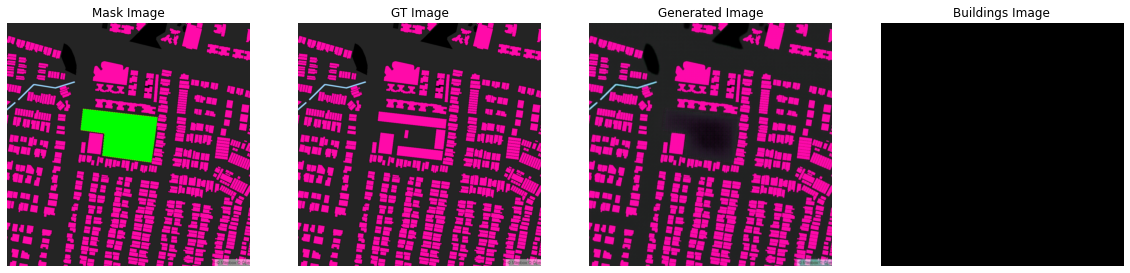

Image: 1379.png, GPR: 1.4, Simplified GPR: 1.4, Storeys:5,  Site area: 17455.9, Building pixels: 0, Mask pixels: 12042, Generated GPR: 0.0


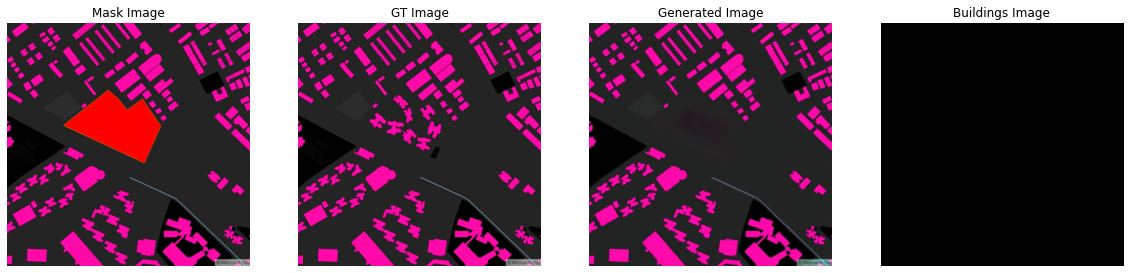

Image: 145.png, GPR: 2.8, Simplified GPR: 2.8, Storeys:15,  Site area: 22094.4, Building pixels: 0, Mask pixels: 16092, Generated GPR: 0.0


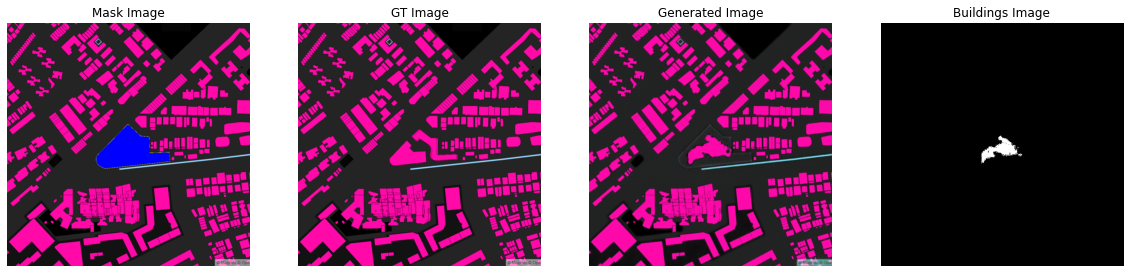

Image: 1484.png, GPR: 3.0, Simplified GPR: 3.0, Storeys:17,  Site area: 10097.1, Building pixels: 1751, Mask pixels: 7503, Generated GPR: 3.9673463947754226


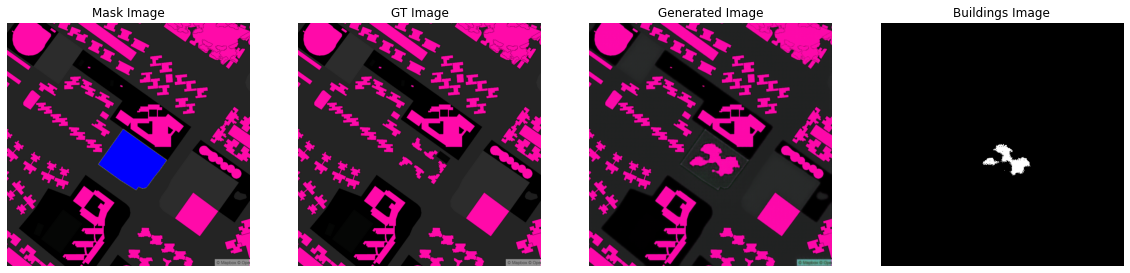

Image: 1602.png, GPR: 3.0, Simplified GPR: 3.0, Storeys:17,  Site area: 13564.8, Building pixels: 2106, Mask pixels: 9811, Generated GPR: 3.6491692997655694


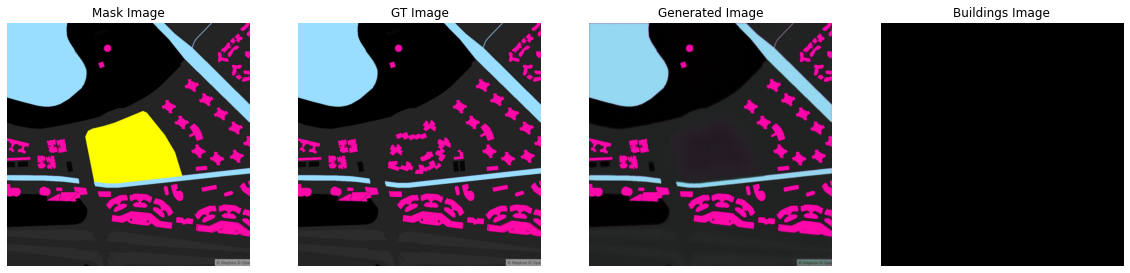

Image: 1655.png, GPR: 2.1, Simplified GPR: 2.1, Storeys:18,  Site area: 27418.2, Building pixels: 0, Mask pixels: 21801, Generated GPR: 0.0


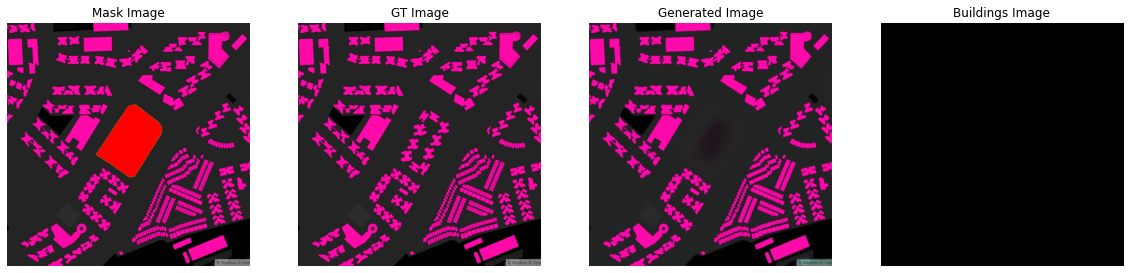

Image: 1670.png, GPR: 2.8, Simplified GPR: 2.8, Storeys:13,  Site area: 17940.2, Building pixels: 0, Mask pixels: 11661, Generated GPR: 0.0


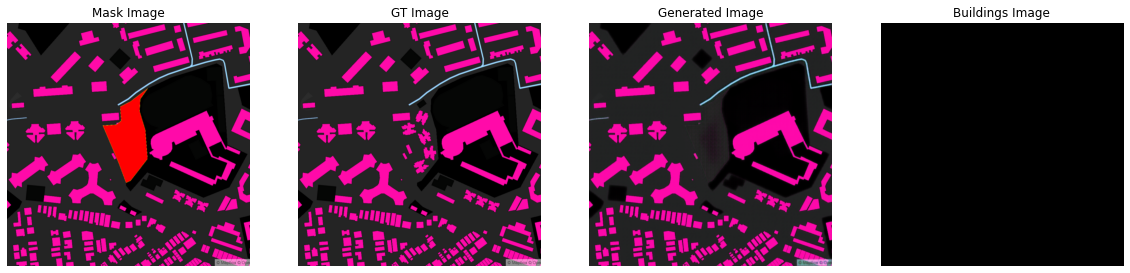

Image: 1796.png, GPR: 2.8, Simplified GPR: 2.8, Storeys:17,  Site area: 13877.2, Building pixels: 0, Mask pixels: 9220, Generated GPR: 0.0


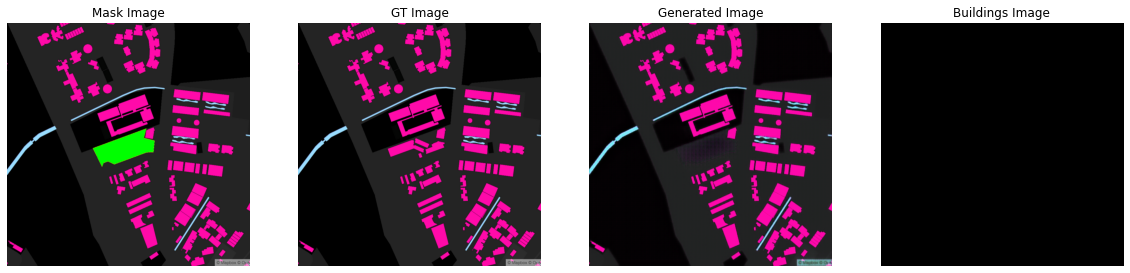

Image: 1811.png, GPR: 1.4, Simplified GPR: 1.4, Storeys:5,  Site area: 7255.7, Building pixels: 0, Mask pixels: 5084, Generated GPR: 0.0


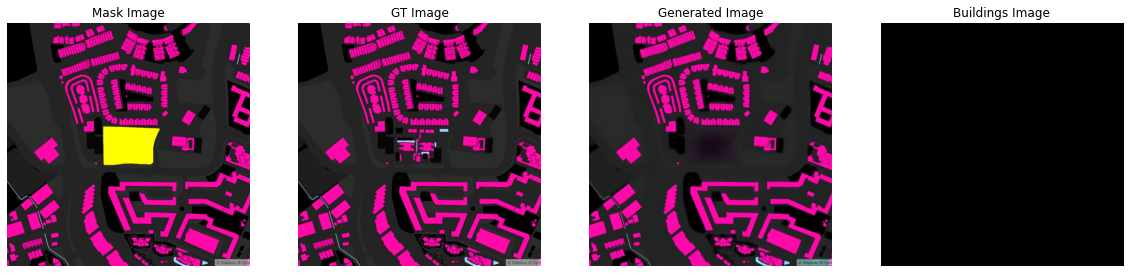

Image: 1876.png, GPR: 2.1, Simplified GPR: 2.1, Storeys:19,  Site area: 10502.8, Building pixels: 0, Mask pixels: 8279, Generated GPR: 0.0


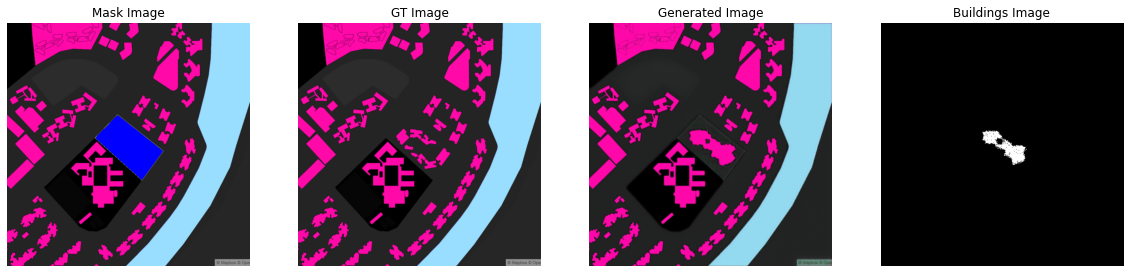

Image: 191.png, GPR: 3.5, Simplified GPR: 3.0, Storeys:18,  Site area: 13000.3, Building pixels: 2406, Mask pixels: 9066, Generated GPR: 4.776968894771675


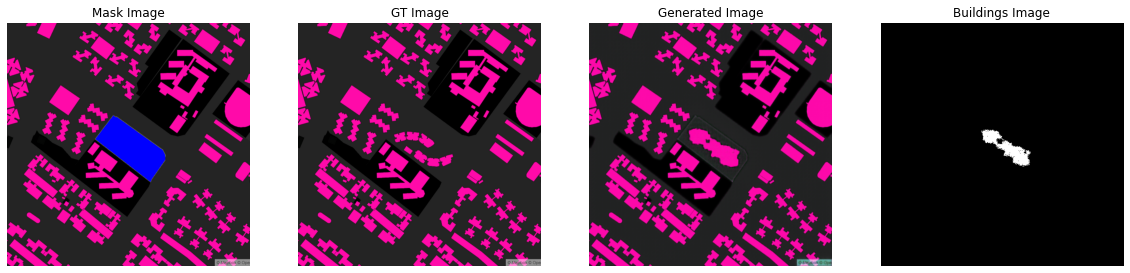

Image: 2000.png, GPR: 3.0, Simplified GPR: 3.0, Storeys:17,  Site area: 13241.8, Building pixels: 2765, Mask pixels: 9503, Generated GPR: 4.946332737030412


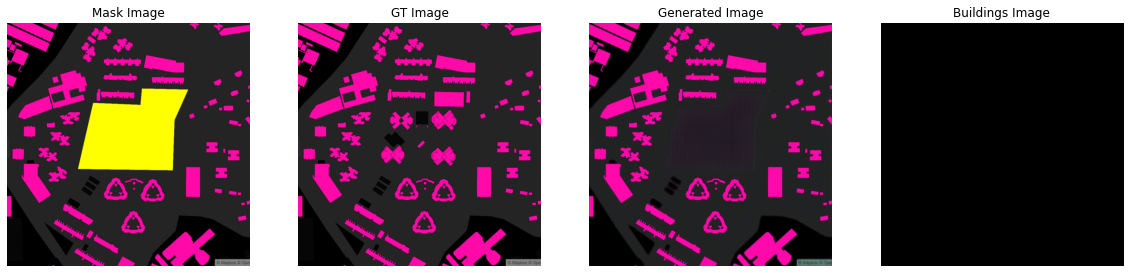

Image: 434.png, GPR: 2.1, Simplified GPR: 2.1, Storeys:16,  Site area: 39401.6, Building pixels: 0, Mask pixels: 28712, Generated GPR: 0.0


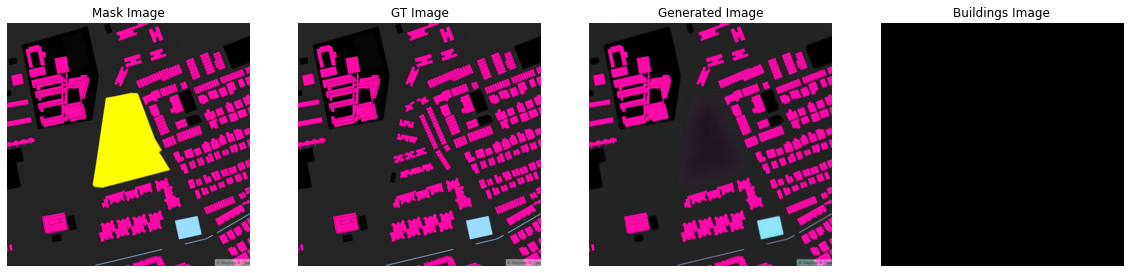

Image: 489.png, GPR: 2.1, Simplified GPR: 2.1, Storeys:15,  Site area: 28692.65, Building pixels: 0, Mask pixels: 20518, Generated GPR: 0.0


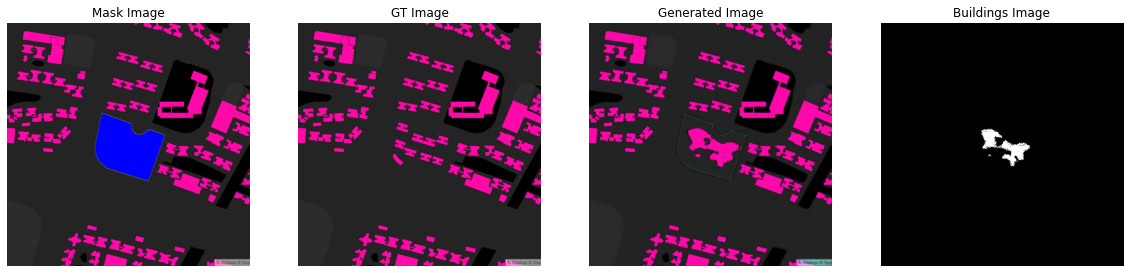

Image: 491.png, GPR: 3.0, Simplified GPR: 3.0, Storeys:16,  Site area: 18747.8, Building pixels: 2680, Mask pixels: 12878, Generated GPR: 3.3297095822332663


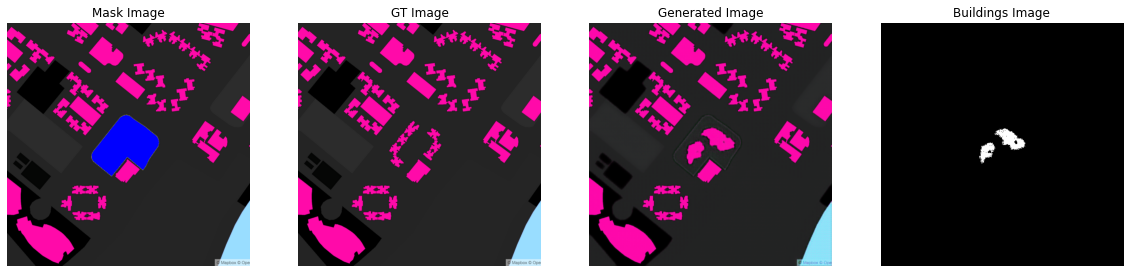

Image: 568.png, GPR: 3.4, Simplified GPR: 3.0, Storeys:19,  Site area: 14344.0, Building pixels: 2198, Mask pixels: 10352, Generated GPR: 4.03419629057187
Absolute accuracies: [0, 0, 0, 0, 0.0938163294184237, 0, 0, 0.3224487982584742, 0.21638976658852313, 0, 0, 0, 0, 0, 0.3648482556490499, 0.6487775790101372, 0, 0, 0.10990319407775544, 0.18652832075643244]
Images:  ['1040.png', '1074.png', '1076.png', '1102.png', '1180.png', '1379.png', '145.png', '1484.png', '1602.png', '1655.png', '1670.png', '1796.png', '1811.png', '1876.png', '191.png', '2000.png', '434.png', '489.png', '491.png', '568.png']
Sanity Ratio: [0.693515311011008, 0.7305782906212264, 0.8089915692035874, 0.7740405697302388, 0.7230777101345475, 0.6898527145549642, 0.7283293504236367, 0.7430846480672668, 0.7232690493040812, 0.7951287830710987, 0.649992753703972, 0.6643991583316519, 0.7006904916134901, 0.7882659862132003, 0.6973685222648709, 0.717651678774789, 0.7287013725330951, 0.7150960263342703, 0.6869072637856175, 0.721

In [10]:
from PIL import Image, ImageEnhance
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os
import pandas as pd

import requests
import json
import re
import csv

directory_path = os.getcwd()
parent_directory_path = os.path.dirname(directory_path)
csv_path = os.path.join(parent_directory_path, 'Model\\condo_data_new_FINAL_test.csv')
gt_masked_image_path = os.path.join(parent_directory_path, 'Model\\clear\\test')
generated_image_path = os.path.join(parent_directory_path, 'Model\\clear\\final_clear_output_3') 

# Read the CSV file
data = pd.read_csv(csv_path)

# Function to extract the numeric part of the filename
def extract_numeric_part(filename):
    numeric_part = ''.join(filter(str.isdigit, filename))
    return int(numeric_part) if numeric_part else None

def create_binary_mask(arr, target_color, threshold=30):
    lower_bound = np.array(target_color) - threshold
    upper_bound = np.array(target_color) + threshold
    mask = (arr[:, :, :3] >= lower_bound) & (arr[:, :, :3] <= upper_bound)
    return np.all(mask, axis=-1)

def extract_building_regions(arr, target_color, threshold=10):
    lower_bound = np.array(target_color) - threshold
    upper_bound = np.array(target_color) + threshold
    mask = (arr[:, :, :3] >= lower_bound) & (arr[:, :, :3] <= upper_bound)
    return np.all(mask, axis=-1)

# def find_max_building_storeys(gpr):
#     max_building_storeys= 0
#     if gpr >= 0 and gpr < 1.4:
#         max_building_storeys = 5
#     elif gpr >= 1.4 and gpr < 1.6:
#         max_building_storeys = 12
#     elif gpr >= 1.6 and gpr < 2.1:
#         max_building_storeys = 24
#     elif gpr >= 2.1 and gpr < 2.8:
#         max_building_storeys = 36
#     elif gpr >= 2.8:
#         max_building_storeys = 48 ## by right got no limit
#     return max_building_storeys

def masked_rgb(simp_gpr):
    rgb = [0,0,0]
    if simp_gpr == 1.4:
        rgb = [0,255,0]
    elif simp_gpr == 1.6:
        rgb = [200,130,60]
    elif simp_gpr == 2.1:
        rgb = [255, 255, 0]
    elif simp_gpr == 2.8:
        rgb = [255,0,0]
    elif simp_gpr == 3.0:
        rgb =[0,0,255]
    return rgb

'''
pink, [255, 10, 169]
brown, [200,130,60]
cyan, [0,255,255]
red, [255,0,0]
black, [0,0,0]
green, [0,255,0]
blue, [0,0,255]
yellow, [255, 255, 0]
'''

absolute_accuracies = []
images =[]
sanity_ratio =[]

# Iterate through the images in the generated_image_path
for image_file in os.listdir(generated_image_path):
    if image_file.endswith('.png'):
        image_index = extract_numeric_part(image_file)

        # Construct the path for the corresponding masked image
        gt_mask_image_filename = f"{image_index}.png"
        gt_mask_image = os.path.join(gt_masked_image_path, gt_mask_image_filename)
        open_gt_mask_image = Image.open(gt_mask_image)
        mask_crop_box = (512, 0, 1024, 512) # right side
        mask_image = open_gt_mask_image.crop(mask_crop_box) #gt_mask is concatenated gt and mask
        gt_crop_box = (0, 0, 512, 512) # left side
        gt_image = open_gt_mask_image.crop(gt_crop_box)

        generated_image = os.path.join(generated_image_path, image_file)
        generated_image =  Image.open(generated_image)

        # Check if the image index matches any index in the CSV
        matched_row = data[data['key1'] == image_index]
        if not matched_row.empty:
            # Extract the GPR value for the matched row
            gpr_value = matched_row['GPR'].iloc[0]
            storey = matched_row['storeys'].iloc[0]
            simplified_gpr_value = matched_row['simp_gpr'].iloc[0]
            actual_site_area = matched_row['area'].iloc[0]
            actual_site_area = actual_site_area.replace(',', '')
            actual_site_area = float(actual_site_area[:-4])
            gpr_value = float(gpr_value)
            storey = int(storey)
            mask_array = np.array(mask_image)
            generated_array = np.array(generated_image)

            mask_color = masked_rgb(simplified_gpr_value)
            site_mask = create_binary_mask(mask_array, mask_color)
            site_area_array = generated_array.copy()
            site_area_array[~site_mask] = [255, 255, 255, 255] # making non-masked region white RMB ITS 4 CHANNELS NOW
            site_area_image = Image.fromarray(site_area_array)

            mask_color = [255, 10, 169] # pink
            building_mask = extract_building_regions(site_area_array, mask_color)
            buildings_image = Image.fromarray(building_mask)

            plt.figure(figsize=(20, 5))
            plt.subplot(1, 4, 1)
            plt.imshow(mask_image)
            plt.title('Mask Image')
            plt.axis('off')
            plt.subplot(1, 4, 2)
            plt.imshow(gt_image)
            plt.title('GT Image')
            plt.axis('off')
            plt.subplot(1, 4, 3)
            plt.imshow(generated_image)
            plt.title('Generated Image')
            plt.axis('off')
            plt.subplot(1, 4, 4)
            plt.imshow(buildings_image, cmap='gray')
            plt.title('Buildings Image')
            plt.axis('off')
            plt.show()

            # accuracy
            building_pixels = np.sum(building_mask)
            mask_pixels = np.sum(site_mask)
            msq_per_pixel = actual_site_area/mask_pixels
            building_area = msq_per_pixel * building_pixels
            #max_storeys = find_max_building_storeys(gpr_value)
            generated_gpr = building_area*storey/actual_site_area
            if generated_gpr == 0:
                accuracy = 0
            else:
                accuracy = (gpr_value - generated_gpr) / gpr_value #gpr_value is the target gpr
            images.append(image_file)
            absolute_accuracy = abs(accuracy)
            absolute_accuracies.append(absolute_accuracy)
            print(f'Image: {image_file}, GPR: {gpr_value}, Simplified GPR: {simplified_gpr_value}, Storeys:{storey},  Site area: {actual_site_area}, Building pixels: {building_pixels}, Mask pixels: {mask_pixels}, Generated GPR: {generated_gpr}')

            #sanity check. ratios should be about 0.75
            ratio = mask_pixels/actual_site_area
            sanity_ratio.append(ratio)

print(f"Absolute accuracies: {absolute_accuracies}")
print('Images: ', images)
print(f"Sanity Ratio: {sanity_ratio}")

total_data = len(absolute_accuracies)
model_accuracy = sum(absolute_accuracies)/total_data
print(f"\nAccuracy for clear data: {model_accuracy}")